In [78]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [79]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [80]:
wb = gc.open_by_url("https://docs.google.com/spreadsheets/d/1aTeZTLx6Lie6PV59_lHqkJVHd-xZB6MDcUlcfcXwIu0/edit?resourcekey#gid=1744632352")
sheet = wb.worksheet('Respuestas de formulario 1')

In [81]:
data = sheet.get_all_values()
df = pd.DataFrame(data)
df.drop(columns=0, inplace=True)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...,Indica el nivel de gusto que tienes por las si...
1,5,5,5,2,2,2,4,5,5,5,5,4,2,5,5,1,5,5,1,3,4,2,2,2,4
2,5,5,5,5,5,4,5,5,4,1,3,1,4,1,1,1,5,1,1,5,4,3,4,1,4
3,5,1,5,5,3,3,2,4,1,4,1,5,5,5,1,3,5,1,5,5,1,1,5,5,5
4,5,5,4,5,4,4,5,5,3,1,2,1,3,1,1,1,4,1,1,5,4,3,3,1,3


In [82]:
titulos=df.iloc[0].values.tolist()
for titulo in titulos:
  print(titulo.split("[")[1][:-1])

Trilogía del seño de los anillos
Trilogía Matrix
Saga Star Wars
Harry Potter
X-Men
Titanic
Avengers
El diablo viste a la moda
El exorcista
Eso
Rocky
Pulp fiction
ET
La lista de Schindler
La historia sin fin
Crepúsculo
Jurasic Park
El padrino
Lo que el viento se llevo
Forest Gump
Milagros inesperados
Tiburón
Sexto sentido
Vaselina
Mi pobre angelito


In [83]:
peliculas=[]
for titulo in titulos:
  peliculas.append(titulo.split("[")[1][:-1])

In [84]:
peliculas=[titulo.split("[")[1][:-1] for titulo in titulos]

In [85]:
df=df.iloc[1:,:]
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
1,5,5,5,2,2,2,4,5,5,5,5,4,2,5,5,1,5,5,1,3,4,2,2,2,4
2,5,5,5,5,5,4,5,5,4,1,3,1,4,1,1,1,5,1,1,5,4,3,4,1,4
3,5,1,5,5,3,3,2,4,1,4,1,5,5,5,1,3,5,1,5,5,1,1,5,5,5
4,5,5,4,5,4,4,5,5,3,1,2,1,3,1,1,1,4,1,1,5,4,3,3,1,3
5,5,4,1,4,4,3,5,5,3,2,5,1,2,1,3,5,4,2,1,3,3,2,5,3,3
6,5,2,1,5,3,4,5,5,4,5,1,1,2,3,1,3,4,2,1,5,4,1,3,3,2
7,3,3,3,1,3,3,3,1,3,3,3,1,3,2,1,1,3,2,2,3,1,3,1,3,3
8,5,5,1,5,3,4,5,5,1,1,1,1,1,4,1,5,1,5,5,5,5,1,5,4,3
9,1,1,4,1,4,4,4,1,1,4,4,4,4,4,1,1,4,4,4,1,1,1,1,1,4
10,2,2,5,3,5,5,3,5,2,2,1,1,3,3,3,5,5,5,1,5,5,3,2,5,5


In [86]:
df.columns=peliculas
df

,Trilogía del seño de los anillos,Trilogía Matrix,Saga Star Wars,Harry Potter,X-Men,Titanic,Avengers,El diablo viste a la moda,El exorcista,Eso,Rocky,Pulp fiction,ET,La lista de Schindler,La historia sin fin,Crepúsculo,Jurasic Park,El padrino,Lo que el viento se llevo,Forest Gump,Milagros inesperados,Tiburón,Sexto sentido,Vaselina,Mi pobre angelito
1,5,5,5,2,2,2,4,5,5,5,5,4,2,5,5,1,5,5,1,3,4,2,2,2,4
2,5,5,5,5,5,4,5,5,4,1,3,1,4,1,1,1,5,1,1,5,4,3,4,1,4
3,5,1,5,5,3,3,2,4,1,4,1,5,5,5,1,3,5,1,5,5,1,1,5,5,5
4,5,5,4,5,4,4,5,5,3,1,2,1,3,1,1,1,4,1,1,5,4,3,3,1,3
5,5,4,1,4,4,3,5,5,3,2,5,1,2,1,3,5,4,2,1,3,3,2,5,3,3
6,5,2,1,5,3,4,5,5,4,5,1,1,2,3,1,3,4,2,1,5,4,1,3,3,2
7,3,3,3,1,3,3,3,1,3,3,3,1,3,2,1,1,3,2,2,3,1,3,1,3,3
8,5,5,1,5,3,4,5,5,1,1,1,1,1,4,1,5,1,5,5,5,5,1,5,4,3
9,1,1,4,1,4,4,4,1,1,4,4,4,4,4,1,1,4,4,4,1,1,1,1,1,4
10,2,2,5,3,5,5,3,5,2,2,1,1,3,3,3,5,5,5,1,5,5,3,2,5,5


In [87]:
from sklearn.neighbors import DistanceMetric

In [88]:
dist=DistanceMetric.get_metric('manhattan')
pd.DataFrame(dist.pairwise(df))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,39.0,52.0,41.0,39.0,41.0,44.0,54.0,44.0,44.0,44.0,42.0,33.0
1,39.0,0.0,45.0,8.0,30.0,30.0,39.0,41.0,51.0,37.0,49.0,39.0,44.0
2,52.0,45.0,0.0,47.0,51.0,39.0,48.0,42.0,42.0,44.0,52.0,38.0,45.0
3,41.0,8.0,47.0,0.0,26.0,24.0,33.0,35.0,49.0,37.0,41.0,35.0,40.0
4,39.0,30.0,51.0,26.0,0.0,26.0,35.0,33.0,55.0,39.0,51.0,45.0,42.0
5,41.0,30.0,39.0,24.0,26.0,0.0,37.0,29.0,51.0,37.0,49.0,45.0,48.0
6,44.0,39.0,48.0,33.0,35.0,37.0,0.0,52.0,30.0,42.0,38.0,38.0,35.0
7,54.0,41.0,42.0,35.0,33.0,29.0,52.0,0.0,58.0,40.0,34.0,44.0,41.0
8,44.0,51.0,42.0,49.0,55.0,51.0,30.0,58.0,0.0,50.0,38.0,40.0,35.0
9,44.0,37.0,44.0,37.0,39.0,37.0,42.0,40.0,50.0,0.0,46.0,48.0,51.0


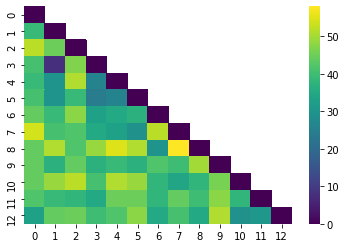

In [145]:
sns.heatmap(pd.DataFrame(dist.pairwise(df)), cmap="viridis", mask=np.triu(pd.DataFrame(dist.pairwise(df))))
plt.show()

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [91]:
Z=linkage(df, method="ward")
Z

array([[ 1.        ,  3.        ,  2.82842712,  2.        ],
       [ 6.        ,  8.        ,  7.34846923,  2.        ],
       [ 4.        ,  5.        ,  7.48331477,  2.        ],
       [11.        , 12.        ,  8.18535277,  2.        ],
       [ 7.        , 15.        ,  9.52190457,  3.        ],
       [10.        , 16.        ,  9.91631652,  3.        ],
       [ 9.        , 17.        , 10.5039675 ,  4.        ],
       [ 0.        , 18.        , 11.05290309,  4.        ],
       [14.        , 20.        , 11.61177563,  6.        ],
       [13.        , 19.        , 11.67618659,  6.        ],
       [ 2.        , 21.        , 12.63592761,  7.        ],
       [22.        , 23.        , 17.52946238, 13.        ]])

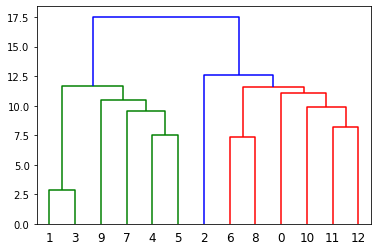

In [92]:
fig, axs = plt.subplots()
dendrogram(Z, ax=axs)
plt.show()

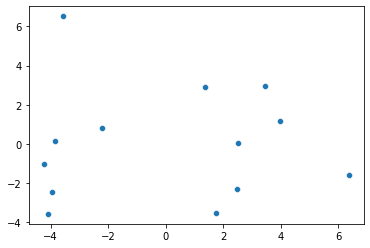

In [93]:
from sklearn.decomposition import PCA
pca=PCA(3)
pca.fit(df)
X_PCA=pca.transform(df)
X_PCA
sns.scatterplot(x=X_PCA[:,0], y=X_PCA[:,1])
plt.show()

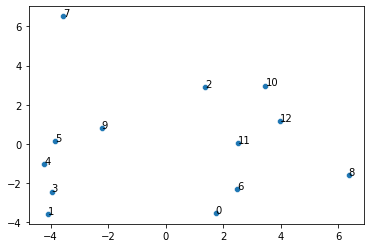

In [94]:
fig, axs = plt.subplots()

sns.scatterplot(x=X_PCA[:,0], y=X_PCA[:,1], ax=axs)

for i in range(len(X_PCA)):
  axs.text(X_PCA[i,0], X_PCA[i,1], i)
plt.show()

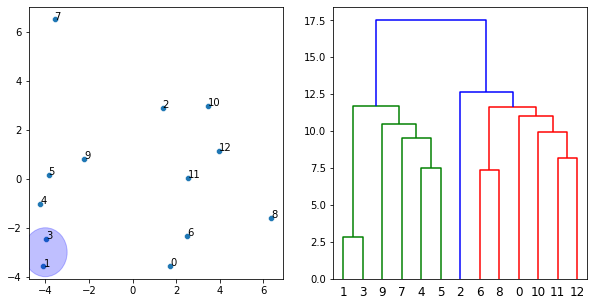

In [114]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(x=X_PCA[:,0], y=X_PCA[:,1], ax=axs[0])

for i in range(len(X_PCA)):
  axs[0].text(X_PCA[i,0], X_PCA[i,1], i)

dendrogram(Z, ax=axs[1])
x= -4
y= -3
r= 1

axs[0].add_patch(plt.Circle((x,y), r, color=(0,0,1,0.25)))

plt.show()

In [96]:
pca.explained_variance_ratio_.sum()

0.5409745706218615

In [97]:
from sklearn.cluster import KMeans
clusters=3
kmeans = KMeans(n_clusters=clusters).fit(df)

In [98]:
kmeans.labels_

array([0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 0, 0], dtype=int32)

In [99]:
kmeans.cluster_centers_

array([[4.8       , 4.        , 4.2       , 2.6       , 3.2       ,
        2.2       , 3.        , 2.6       , 2.        , 3.        ,
        2.4       , 4.2       , 2.6       , 4.6       , 2.6       ,
        1.4       , 3.8       , 3.6       , 3.6       , 4.2       ,
        3.        , 2.4       , 3.6       , 2.2       , 3.2       ],
       [4.5       , 3.83333333, 2.83333333, 4.5       , 4.        ,
        4.        , 4.66666667, 5.        , 2.83333333, 2.        ,
        2.16666667, 1.        , 2.5       , 2.16666667, 1.66666667,
        3.33333333, 3.83333333, 2.66666667, 1.66666667, 4.66666667,
        4.16666667, 2.16666667, 3.66666667, 2.83333333, 3.33333333],
       [2.        , 2.        , 3.5       , 1.        , 3.5       ,
        3.5       , 3.5       , 1.        , 2.        , 3.5       ,
        3.5       , 2.5       , 3.5       , 3.        , 1.        ,
        1.        , 3.5       , 3.        , 3.        , 2.        ,
        1.        , 2.        , 1.        , 2.

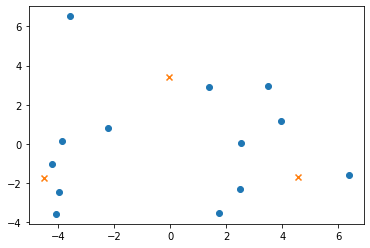

In [109]:
centroides=pca.fit_transform(kmeans.cluster_centers_)
plt.scatter(x=X_PCA[:,0], y=X_PCA[:,1])
plt.scatter(x=centroides[:,0], y=centroides[:,1], marker="x")
plt.show()

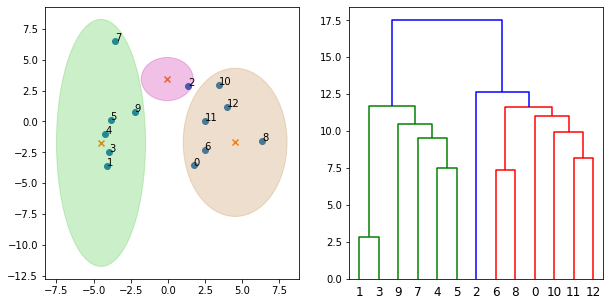

In [139]:
from matplotlib.patches import Ellipse
fig, axs = plt.subplots(1,2, figsize=(10,5))
np.random.seed(10)

axs[0].scatter(x=X_PCA[:,0], y=X_PCA[:,1])

for i in range(len(X_PCA)):
  axs[0].text(X_PCA[i,0], X_PCA[i,1], i)

dendrogram(Z, ax=axs[1])

axs[0].scatter(x=centroides[:,0], y=centroides[:,1], marker="x")
angulos= []
ancho= [3.5, 7, 6]
largo= [3.5, 12, 20]
for i in range(3):
  x = centroides[i,0]
  y = centroides[i,1]
  w = ancho[i]
  h = largo[i]
  axs[0].add_patch(Ellipse((x,y), w, h, color=(np.random.rand(),np.random.rand(),np.random.rand(),0.25)))

plt.show()